In [ ]:
#The normalized integral of the PSD for each frequency range is computed. 
#This code was used for both PSD and welch PSD for training data, and for PSD for test data. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import csv
import glob
from scipy.optimize import curve_fit
from scipy.fft import fft
from scipy import signal
import os
import networkx as nx
from scipy import stats
from scipy.stats import pearsonr
from statsmodels.sandbox.stats.multicomp import multipletests
from scipy.signal import find_peaks
import statistics
from scipy.signal import peak_widths
from sklearn.metrics import mutual_info_score
import matplotlib.patches as mpatches
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import random

In [25]:
folder_path = 'psd_epi'
# Leggi tutti i file nella cartella
filenames_epi = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')], key=lambda x: int(x.split('_')[0]) if x.split('_')[0].isdigit() else float('inf'))
# Apri il file in modalità scrittura ('w')

if not os.path.exists('risultati_int_epi_test'):
    os.makedirs('risultati_int_epi_test')

# Apri i file in modalità scrittura ('w')
with open('risultati_int_epi/risultati_int_delta.csv', 'w', newline='') as file_delta, \
    open('risultati_int_epi/risultati_int_teta.csv', 'w', newline='') as file_teta, \
    open('risultati_int_epi/risultati_int_beta.csv', 'w', newline='') as file_beta:
    open('risultati_int_epi/risultati_int_alpha.csv', 'w', newline='') as file_alpha, \
     
     open('risultati_int_epi/risultati_int_gamma1.csv', 'w', newline='') as file_gamma1, \
     open('risultati_int_epi/risultati_int_gamma2.csv', 'w', newline='') as file_gamma2, \
     open('risultati_int_epi/risultati_int_gamma3.csv', 'w', newline='') as file_gamma3, \
     open('risultati_int_epi/risultati_int_gamma4.csv', 'w', newline='') as file_gamma4:
       
    writer_delta = csv.writer(file_delta)
    writer_teta = csv.writer(file_teta)
    writer_alpha = csv.writer(file_alpha)
    writer_beta = csv.writer(file_beta)
    writer_gamma1 = csv.writer(file_gamma1)
    writer_gamma2 = csv.writer(file_gamma2)
    writer_gamma3 = csv.writer(file_gamma3)
    writer_gamma4 = csv.writer(file_gamma4)

    # Scrivi l'intestazione
    writer_delta.writerow(['Canale', 'Delta'])
    writer_teta.writerow(['Canale', 'Teta'])
    writer_alpha.writerow(['Canale', 'Alpha'])
    writer_beta.writerow(['Canale', 'Beta'])
    writer_gamma1.writerow(['Canale', 'Gamma1'])
    writer_gamma2.writerow(['Canale', 'Gamma2'])
    writer_gamma3.writerow(['Canale', 'Gamma3'])
    writer_gamma4.writerow(['Canale', 'Gamma4'])

    epi_delta=[]
    epi_teta=[]
    epi_alpha=[]
    epi_beta=[]
    epi_gamma1=[]
    epi_gamma2=[]
    epi_gamma3=[]
    epi_gamma4=[]

    for filename in filenames_epi:
        file_path = os.path.join(folder_path, filename)

        # Controlla se il file è vuoto
        if os.path.getsize(file_path) == 0:
            print(f"Il file {filename} è vuoto")
            continue

        # Leggi il file CSV
        df = pd.read_csv(file_path)

        # Calcola l'integrale della PSD per la sub-band
        psd_sub_band_delta = np.trapz(df[(df['Frequenza'] >= 0.4) & (df['Frequenza'] <= 4)]['PSD'], df[(df['Frequenza'] >= 0.4) & (df['Frequenza'] <= 4)]['Frequenza'])
        psd_sub_band_teta = np.trapz(df[(df['Frequenza'] >= 4) & (df['Frequenza'] <= 8)]['PSD'], df[(df['Frequenza'] >= 4) & (df['Frequenza'] <= 8)]['Frequenza'])
        psd_sub_band_alpha = np.trapz(df[(df['Frequenza'] >= 8) & (df['Frequenza'] <= 13)]['PSD'], df[(df['Frequenza'] >= 8) & (df['Frequenza'] <= 13)]['Frequenza'])
        psd_sub_band_beta = np.trapz(df[(df['Frequenza'] >= 13) & (df['Frequenza'] <= 30)]['PSD'], df[(df['Frequenza'] >= 13) & (df['Frequenza'] <= 30)]['Frequenza'])
        psd_sub_band_gamma1 = np.trapz(df[(df['Frequenza'] >= 30) & (df['Frequenza'] <= 50)]['PSD'], df[(df['Frequenza'] >= 30) & (df['Frequenza'] <= 50)]['Frequenza'])
        psd_sub_band_gamma2 = np.trapz(df[(df['Frequenza'] >= 50) & (df['Frequenza'] <= 70)]['PSD'], df[(df['Frequenza'] >= 50) & (df['Frequenza'] <= 70)]['Frequenza'])
        psd_sub_band_gamma3 = np.trapz(df[(df['Frequenza'] >= 70) & (df['Frequenza'] <= 90)]['PSD'], df[(df['Frequenza'] >= 70) & (df['Frequenza'] <= 90)]['Frequenza'])
        psd_sub_band_gamma4 = np.trapz(df[(df['Frequenza'] >= 90)]['PSD'], df[(df['Frequenza'] >= 90)]['Frequenza'])

        # Calcola l'integrale della PSD per tutte le frequenze
        psd_totale = np.trapz(df['PSD'], df['Frequenza'])

        # Normalizza la PSD per la sub-band
        psd_normalizzata_delta = psd_sub_band_delta / psd_totale
        psd_normalizzata_teta = psd_sub_band_teta / psd_totale
        psd_normalizzata_alpha = psd_sub_band_alpha / psd_totale
        psd_normalizzata_beta = psd_sub_band_beta / psd_totale
        psd_normalizzata_gamma1 = psd_sub_band_gamma1 / psd_totale
        psd_normalizzata_gamma2 = psd_sub_band_gamma2 / psd_totale
        psd_normalizzata_gamma3 = psd_sub_band_gamma3 / psd_totale
        psd_normalizzata_gamma4 = psd_sub_band_gamma4 / psd_totale

        epi_delta.append(psd_normalizzata_delta)
        epi_teta.append(psd_normalizzata_teta)
        epi_alpha.append(psd_normalizzata_alpha)
        epi_beta.append(psd_normalizzata_beta)
        epi_gamma1.append(psd_normalizzata_gamma1)
        epi_gamma2.append(psd_normalizzata_gamma2)
        epi_gamma3.append(psd_normalizzata_gamma3)
        epi_gamma4.append(psd_normalizzata_gamma4)   

        # Aggiungi la riga al file CSV
        writer_delta.writerow([filename, psd_normalizzata_delta])
        writer_teta.writerow([filename, psd_normalizzata_teta])
        writer_alpha.writerow([filename, psd_normalizzata_alpha])
        writer_beta.writerow([filename, psd_normalizzata_beta])
        writer_gamma1.writerow([filename, psd_normalizzata_gamma1])
        writer_gamma2.writerow([filename, psd_normalizzata_gamma2])
        writer_gamma3.writerow([filename, psd_normalizzata_gamma3])
        writer_gamma4.writerow([filename, psd_normalizzata_gamma4])




In [26]:
folder_path = 'PSD_0_second_dataset_due_colonne'
# Leggi tutti i file nella cartella
filenames_non_epi = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')], key=lambda x: int(x.split('_')[0]) if x.split('_')[0].isdigit() else float('inf'))
#risultati_int_delta_N=non epi
if not os.path.exists('risultati_int_non_epi'):
    os.makedirs('risultati_int_non_epi')

# Apri i file in modalità scrittura ('w')
with open('risultati_int_non_epi/risultati_int_delta_N.csv', 'w', newline='') as file_delta, \
     open('risultati_int_non_epi/risultati_int_teta_N.csv', 'w', newline='') as file_teta, \
     open('risultati_int_non_epi/risultati_int_beta_N.csv', 'w', newline='') as file_beta:
     open('risultati_int_non_epi_test/risultati_int_alpha_N_test.csv', 'w', newline='') as file_alpha, \
     open('risultati_int_non_epi_test/risultati_int_gamma1_N_test.csv', 'w', newline='') as file_gamma1, \
     open('risultati_int_non_epi_test/risultati_int_gamma2_N_test.csv', 'w', newline='') as file_gamma2, \
     open('risultati_int_non_epi_test/risultati_int_gamma3_N_test.csv', 'w', newline='') as file_gamma3, \
     open('risultati_int_non_epi_test/risultati_int_gamma4_N_test.csv', 'w', newline='') as file_gamma4:
    pass

    writer_delta = csv.writer(file_delta)
    writer_teta = csv.writer(file_teta)
    writer_alpha = csv.writer(file_alpha)
    writer_beta = csv.writer(file_beta)
    writer_gamma1 = csv.writer(file_gamma1)
    writer_gamma2 = csv.writer(file_gamma2)
    writer_gamma3 = csv.writer(file_gamma3)
    writer_gamma4 = csv.writer(file_gamma4)
    
    # Scrivi l'intestazione
    writer_delta.writerow(['Canale', 'Delta'])
    writer_teta.writerow(['Canale', 'Teta'])
    writer_alpha.writerow(['Canale', 'Alpha'])
    writer_beta.writerow(['Canale', 'Beta'])
    writer_gamma1.writerow(['Canale', 'Gamma1'])
    writer_gamma2.writerow(['Canale', 'Gamma2'])
    writer_gamma3.writerow(['Canale', 'Gamma3'])
    writer_gamma4.writerow(['Canale', 'Gamma4'])
    
    non_epi_delta=[]
    non_epi_teta=[]
    non_epi_alpha=[]
    non_epi_beta=[]
    non_epi_gamma1=[]
    non_epi_gamma2=[]
    non_epi_gamma3=[]
    non_epi_gamma4=[]
    
    for filename in filenames_non_epi:
        file_path = os.path.join(folder_path, filename)

        # Controlla se il file è vuoto
        if os.path.getsize(file_path) == 0:
            print(f"Il file {filename} è vuoto")
            continue

        # Leggi il file CSV
        df = pd.read_csv(file_path)

        # Calcola l'integrale della PSD per la sub-band
        psd_sub_band_delta = np.trapz(df[(df['Frequenza'] >= 0.4) & (df['Frequenza'] <= 4)]['PSD'], df[(df['Frequenza'] >= 0.4) & (df['Frequenza'] <= 4)]['Frequenza'])
        psd_sub_band_teta = np.trapz(df[(df['Frequenza'] >= 4) & (df['Frequenza'] <= 8)]['PSD'], df[(df['Frequenza'] >= 4) & (df['Frequenza'] <= 8)]['Frequenza'])
        psd_sub_band_alpha = np.trapz(df[(df['Frequenza'] >= 8) & (df['Frequenza'] <= 13)]['PSD'], df[(df['Frequenza'] >= 8) & (df['Frequenza'] <= 13)]['Frequenza'])
        psd_sub_band_beta = np.trapz(df[(df['Frequenza'] >= 13) & (df['Frequenza'] <= 30)]['PSD'], df[(df['Frequenza'] >= 13) & (df['Frequenza'] <= 30)]['Frequenza'])
        psd_sub_band_gamma1 = np.trapz(df[(df['Frequenza'] >= 30) & (df['Frequenza'] <= 50)]['PSD'], df[(df['Frequenza'] >= 30) & (df['Frequenza'] <= 50)]['Frequenza'])
        psd_sub_band_gamma2 = np.trapz(df[(df['Frequenza'] >= 50) & (df['Frequenza'] <= 70)]['PSD'], df[(df['Frequenza'] >= 50) & (df['Frequenza'] <= 70)]['Frequenza'])
        psd_sub_band_gamma3 = np.trapz(df[(df['Frequenza'] >= 70) & (df['Frequenza'] <= 90)]['PSD'], df[(df['Frequenza'] >= 70) & (df['Frequenza'] <= 90)]['Frequenza'])
        psd_sub_band_gamma4 = np.trapz(df[(df['Frequenza'] >= 90)]['PSD'], df[(df['Frequenza'] >= 90)]['Frequenza'])

        # Calcola l'integrale della PSD per tutte le frequenze
        psd_totale = np.trapz(df['PSD'], df['Frequenza'])

        # Normalizza la PSD per la sub-band
        psd_normalizzata_delta = psd_sub_band_delta / psd_totale
        psd_normalizzata_teta = psd_sub_band_teta / psd_totale
        psd_normalizzata_alpha = psd_sub_band_alpha / psd_totale
        psd_normalizzata_beta = psd_sub_band_beta / psd_totale
        psd_normalizzata_gamma1 = psd_sub_band_gamma1 / psd_totale
        psd_normalizzata_gamma2 = psd_sub_band_gamma2 / psd_totale
        psd_normalizzata_gamma3 = psd_sub_band_gamma3 / psd_totale
        psd_normalizzata_gamma4 = psd_sub_band_gamma4 / psd_totale

        non_epi_delta.append(psd_normalizzata_delta)
        non_epi_teta.append(psd_normalizzata_teta)
        non_epi_alpha.append(psd_normalizzata_alpha)
        non_epi_beta.append(psd_normalizzata_beta)
        non_epi_gamma1.append(psd_normalizzata_gamma1)
        non_epi_gamma2.append(psd_normalizzata_gamma2)
        non_epi_gamma3.append(psd_normalizzata_gamma3)
        non_epi_gamma4.append(psd_normalizzata_gamma4)   
        
        # Aggiungi la riga al file CSV
        writer_delta.writerow([filename, psd_normalizzata_delta])
        writer_teta.writerow([filename, psd_normalizzata_teta])
        writer_alpha.writerow([filename, psd_normalizzata_alpha])
        writer_beta.writerow([filename, psd_normalizzata_beta])
        writer_gamma1.writerow([filename, psd_normalizzata_gamma1])
        writer_gamma2.writerow([filename, psd_normalizzata_gamma2])
        writer_gamma3.writerow([filename, psd_normalizzata_gamma3])
        writer_gamma4.writerow([filename, psd_normalizzata_gamma4])
    


In [27]:
# Calcola il valore medio
media_delta = np.mean(epi_delta)
media_teta = np.mean(epi_teta)
media_alpha = np.mean(epi_alpha)
media_beta = np.mean(epi_beta)
media_gamma1 = np.mean(epi_gamma1)
media_gamma2 = np.mean(epi_gamma2)
media_gamma3 = np.mean(epi_gamma3)
media_gamma4 = np.mean(epi_gamma4)


# Calcola la deviazione standard
std_delta = np.std(epi_delta)
std_teta = np.std(epi_teta)
std_alpha = np.std(epi_alpha)
std_beta = np.std(epi_beta)
std_gamma1 = np.std(epi_gamma1)
std_gamma2 = np.std(epi_gamma2)
std_gamma3 = np.std(epi_gamma3)
std_gamma4 = np.std(epi_gamma4)

In [28]:
# Calcola il valore medio
media_delta_n = np.mean(non_epi_delta)
media_teta_n = np.mean(non_epi_teta)
media_alpha_n = np.mean(non_epi_alpha)
media_beta_n = np.mean(non_epi_beta)
media_gamma1_n = np.mean(non_epi_gamma1)
media_gamma2_n = np.mean(non_epi_gamma2)
media_gamma3_n = np.mean(non_epi_gamma3)
media_gamma4_n = np.mean(non_epi_gamma4)


# Calcola la deviazione standard
std_delta_n=np.std(non_epi_delta)
std_teta_n = np.std(non_epi_teta)
std_alpha_n = np.std(non_epi_alpha)
std_beta_n = np.std(non_epi_beta)
std_gamma1_n = np.std(non_epi_gamma1)
std_gamma2_n = np.std(non_epi_gamma2)
std_gamma3_n = np.std(non_epi_gamma3)
std_gamma4_n = np.std(non_epi_gamma4)


In [ ]:
# Supponiamo che 'medie' e 'dev_standard' siano i tuoi dizionari con le medie e le deviazioni standard calcolate
# medie = {'delta': media_delta, 'teta': media_teta, 'alpha': media_alpha, 'beta': media_beta, 'gamma1': media_gamma1, 'gamma2': media_gamma2, 'gamma3': media_gamma3, 'gamma4': media_gamma4}
# dev_standard = {'delta': std_delta, 'teta': std_teta, 'alpha': std_alpha, 'beta': std_beta, 'gamma1': std_gamma1, 'gamma2': std_gamma2, 'gamma3': std_gamma3, 'gamma4': std_gamma4}

# medie_n = {'delta': media_delta_n, 'teta': media_teta_n, 'alpha': media_alpha_n, 'beta': media_beta_n, 'gamma1': media_gamma1_n, 'gamma2': media_gamma2_n, 'gamma3': media_gamma3_n, 'gamma4': media_gamma4_n}
# dev_standard_n = {'delta': std_delta_n, 'teta': std_teta_n, 'alpha': std_alpha_n, 'beta': std_beta_n, 'gamma1': std_gamma1_n, 'gamma2': std_gamma2_n, 'gamma3': std_gamma3_n, 'gamma4': std_gamma4_n}

# if not os.path.exists('risultati_int_test'):
#     os.makedirs('risultati_int_test')

# # Crea un DataFrame da questi dizionari
# df = pd.DataFrame({'Media Epi': medie, 'Dev Standard': dev_standard, 'Media Non Epi':medie_n, 'Dev Standard Non Epi': dev_standard_n})

# # Stampa il DataFrame
# print(df)

# # Salva il DataFrame in un file CSV
# df.to_csv('risultati_int/Media_e_dev.standard.csv')

# # Salva il DataFrame in un file PDF
# import matplotlib.pyplot as plt
# import matplotlib.backends.backend_pdf

# fig, ax =plt.subplots(figsize=(12,4))
# ax.axis('tight')
# ax.axis('off')
# the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center')

# # Salvare la figura in un file PDF
# pdf = matplotlib.backends.backend_pdf.PdfPages("risultati_int/Media_e_dev.standard.pdf")
# pdf.savefig(fig, bbox_inches='tight')
# pdf.close()



Esecuzione del test per delta:

Esecuzione del test per teta:

Esecuzione del test per beta:
       Shapiro-Wilk (epi)  Shapiro-Wilk (non epi)  Test F  Test t o Welch  \
delta            0.486294            9.440159e-03     NaN             NaN   
teta             0.094147            1.155631e-03     NaN             NaN   
beta             0.282533            1.186618e-11     NaN             NaN   

       Test U di Mann-Whitney  
delta            3.495119e-11  
teta             7.612421e-08  
beta             1.518798e-07  


NameError: name 'matplotlib' is not defined

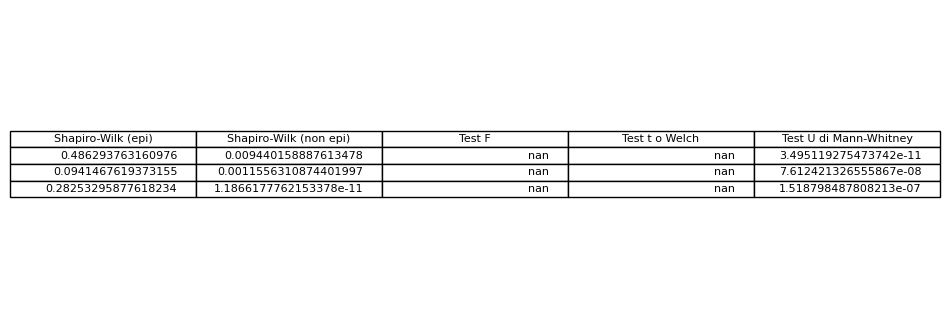

In [29]:

# Definisci le liste
liste = {
    "delta": {"epi": epi_delta, "non_epi": non_epi_delta},
    "teta": {"epi": epi_teta, "non_epi": non_epi_teta},
    "alpha": {"epi": epi_alpha, "non_epi": non_epi_alpha},
    "beta": {"epi": epi_beta, "non_epi": non_epi_beta},
    "gamma1": {"epi": epi_gamma1, "non_epi": non_epi_gamma1},
    "gamma2": {"epi": epi_gamma2, "non_epi": non_epi_gamma2},
    "gamma3": {"epi": epi_gamma3, "non_epi": non_epi_gamma3},
    "gamma4": {"epi": epi_gamma4, "non_epi": non_epi_gamma4}
}

# Crea un DataFrame vuoto per salvare i risultati
risultati = pd.DataFrame(columns=["Shapiro-Wilk (epi)", "Shapiro-Wilk (non epi)", "Test F", "Test t o Welch", "Test U di Mann-Whitney"])

# Esegui il test per ogni lista
for nome, gruppi in liste.items():
    print(f"\nEsecuzione del test per {nome}:")
    
    _, p_shapiro1 = stats.shapiro(gruppi["epi"])
    _, p_shapiro2 = stats.shapiro(gruppi["non_epi"])

    if p_shapiro1 > 0.05 and p_shapiro2 > 0.05:
        _, p_f = stats.levene(gruppi["epi"], gruppi["non_epi"])
        if p_f > 0.05:
            _, p_t = stats.ttest_ind(gruppi["epi"], gruppi["non_epi"])
        else:
            _, p_t = stats.ttest_ind(gruppi["epi"], gruppi["non_epi"], equal_var=False)
    else:
        _, p_u = stats.mannwhitneyu(gruppi["epi"], gruppi["non_epi"])
        p_t = None  # Non esiste un valore p per il test t in questo caso
        p_f=None
    # Aggiungi i risultati al DataFrame
    risultati.loc[nome] = [p_shapiro1, p_shapiro2, p_f, p_t, p_u]

# Stampa il DataFrame
print(risultati)
# Salva il DataFrame in un file CSV
risultati.to_csv('risultati_int/risultati.csv')

fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=risultati.values,colLabels=risultati.columns,loc='center')

